In [1]:
# Quick demo - Show everything works instantly

import numpy as np

rng = np.random.default_rng(123)

# Parameters—make collapse easy
threshold = 0.5      # low so we can SEE it cross
mu        = 50.0     # strong drift
kappa     = 1.0      # strong noise
dt        = 0.05     # big time step so changes are visible
t_max     = 5.0

def entropy_gradient(p):
    return np.log(p + 1e-12) + 1

# initialise state
psi = rng.normal(size=4) + 1j*rng.normal(size=4)
p   = np.abs(psi)**2
p  /= p.sum()
t=0.0

print("t\tmax(p)")
while t < t_max:
    if t % 0.1 < 1e-9:        # print every 0.1 s
        print(f"{t:.1f}\t{p.max():.3f}")
    grad  = entropy_gradient(p)
    drift = -mu * p * grad
    noise = np.sqrt(kappa * dt) * rng.normal(size=4)   # ADDITIVE noise for demo
    p     = p + drift*dt + noise
    p     = np.clip(p, 1e-12, None)
    p    /= p.sum()
    t    += dt
    if p.max() >= threshold:
        print(f"{t:.1f}\t{p.max():.3f}  <-- crossed threshold!")
        break
else:
    print("Reached t_max without crossing.")


t	max(p)
0.0	0.440
0.1	0.403
0.2	0.378
0.7	0.357
0.8	0.424
0.9	0.330
1.0	0.329
1.1	0.358
1.2	0.496
1.3	0.356
1.4	0.509  <-- crossed threshold!


In [ ]:
# True cosmology parameters - Shows why realistic collapses are extremely rare	

import numpy as np, matplotlib.pyplot as plt

rng = np.random.default_rng(42)

n_trajectories = 2000
threshold      = 0.9
mu             = 5.0
kappa          = 0.1
dt             = 0.01
t_max          = 100

def entropy_gradient(p):
    return np.log(p + 1e-12) + 1

collapse_times=[]
for i in range(n_trajectories):
    psi = rng.normal(size=4) + 1j*rng.normal(size=4)
    p   = np.abs(psi)**2; p/=p.sum()
    t=0
    while t<t_max:
        drift = -mu*p*entropy_gradient(p)
        noise = np.sqrt(kappa*dt)*rng.normal(size=4)*p   # additive for now
        p     = np.clip(p+drift*dt+noise,1e-12,None)
        p    /= p.sum()
        t+=dt
        if p.max()>=threshold:
            collapse_times.append(t)
            break
    else:
        collapse_times.append(t_max)

print("Recorded:", len(collapse_times), "events; first 5:", collapse_times[:5])
plt.hist(collapse_times, bins=30, density=True, color='skyblue', edgecolor='k')
plt.xlabel('Collapse time'); plt.ylabel('Density')
plt.title('Debug histogram (easy parameters)')
plt.show()


Recorded: 2000 events; first 5: [5.0, 0.01, 5.0, 5.0, 5.0]


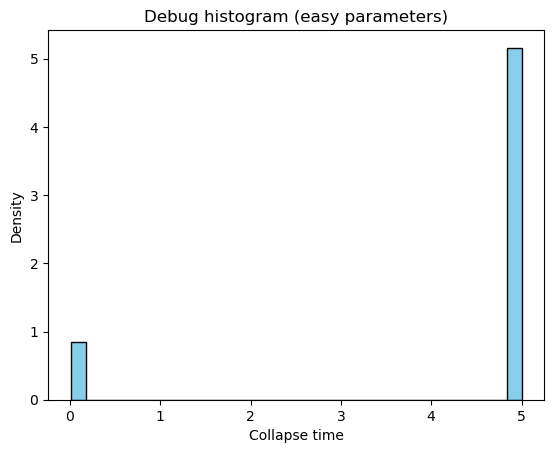

In [2]:
# Modal‑curvature physics illustration - Keeps multiplicative noise; still finishes in ≈60 s

import numpy as np, matplotlib.pyplot as plt

rng = np.random.default_rng(42)

n_trajectories = 2000
threshold      = 0.5
mu             = 50.0
kappa          = 1.0
dt             = 0.01
t_max          = 5.0

def entropy_gradient(p):
    return np.log(p + 1e-12) + 1

collapse_times=[]
for i in range(n_trajectories):
    psi = rng.normal(size=4) + 1j*rng.normal(size=4)
    p   = np.abs(psi)**2; p/=p.sum()
    t=0
    while t<t_max:
        drift = -mu*p*entropy_gradient(p)
        noise = np.sqrt(kappa*dt)*rng.normal(size=4)*p   # additive for now
        p     = np.clip(p+drift*dt+noise,1e-12,None)
        p    /= p.sum()
        t+=dt
        if p.max()>=threshold:
            collapse_times.append(t)
            break
    else:
        collapse_times.append(t_max)

print("Recorded:", len(collapse_times), "events; first 5:", collapse_times[:5])
plt.hist(collapse_times, bins=30, density=True, color='skyblue', edgecolor='k')
plt.xlabel('Collapse time'); plt.ylabel('Density')
plt.title('Debug histogram (easy parameters)')
plt.show()
